In [1]:
default_path = "C:/Users/jacqu/Downloads/"
source_path = default_path+"trials/101_cases_pdf"
destination_path = default_path+"trials/101_cases_txt"

In [2]:
import sys
sys.path.append("C:/Users/jacqu/OneDrive/Documents/MSDS-at-UVA-2023/Projects/Capstone/Spring 24") 
from extraction_run import Extraction

In [3]:
mydf = Extraction(source_path, destination_path)

In [4]:
INFO = mydf.create_info()

In [5]:
mydf.INFO.shape

(102, 3)

In [6]:
index_list_df1 = INFO.index

In [7]:
import pandas as pd
import numpy as np

In [8]:
labels = pd.read_csv(default_path+"trials/updated_101_cases.csv")
labels.shape

(101, 2)

In [9]:
labels.set_index('CaseName', inplace=True)

In [10]:
index_list_df2 = labels.index

### Grace
I changed the csv file for three things: 
<ol>
    <li>S.Y. v. Wyndham Hotels(2) ==> S. Y. v. Wyndham Hotels(2)</li>
    <li>S.Y. v. Wyndham Hotels(3) ==> S. Y. v. Wyndham Hotels(3)</li>
    <li>People v. Lamb_ 37 N.Y.3d 1174.PDF ==> People v. Lamb_ 37 N.Y.3d 1174.pdf</li>
    <li>Samsung Fire _ Marine Ins. Co., Ltd. v. UFVS Mgmt. Co., LLC, 2023 U.S. Dist. LEXIS 46508.pdf ==> Samsung Fire & Marine Ins. Co., Ltd. v. UFVS Mgmt. Co., LLC, 2023 U.S. Dist. LEXIS 46508.pdf</li>

</ol>

In [11]:
#labels.drop(columns=['Narrative'], inplace=True)
labels.index = [each_title.split(".pdf")[0].strip() for each_title in labels.index]
labels.index.name = 'file_title'
# labels.index = labels.index.str.replace("'", "_")
labels.rename(columns={"Sex_Trafficking":"label"}, inplace=True)
labels

label
file_title                                               
A.B. v. Shilo Inn, Salem, LLC, 2023 U.S. Dist. ...      1
A.D. v. Best Western Int_l, Inc., 2023 U.S. Dis...      1
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...      1
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...      1
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...      1
...                                                   ...
Vidal v. Galaxy 2439 Enters., LLC, 2023 U.S. Di...      0
Williams v. Sisolak, 2023 U.S. App. LEXIS 32338         1
Wilson v. Conn. DOT, 2023 U.S. Dist. LEXIS 217795       0
Wisdom v. Perez, 2023 U.S. Dist. LEXIS 217366           0
Woodhull Freedom Found. v. United States, 72 F....      1

[101 rows x 1 columns]

In [12]:
INFO = mydf.add_labels(labels)
INFO.shape

(101, 4)

In [13]:
INFO.head()

pdf_path  \
file_title                                                                                          
A.B. v. Shilo Inn, Salem, LLC, 2023 U.S. Dist. ...  C:/Users/jacqu/Downloads/trials/101_cases_pdf   
A.D. v. Best Western Int_l, Inc., 2023 U.S. Dis...  C:/Users/jacqu/Downloads/trials/101_cases_pdf   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  C:/Users/jacqu/Downloads/trials/101_cases_pdf   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  C:/Users/jacqu/Downloads/trials/101_cases_pdf   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  C:/Users/jacqu/Downloads/trials/101_cases_pdf   

                                                                                         txt_path  \
file_title                                                                                          
A.B. v. Shilo Inn, Salem, LLC, 2023 U.S. Dist. ...  C:/Users/jacqu/Downloads/trials/101_cases_txt   
A.D. v. Best Western Int_l, Inc., 2023 U.S. Dis...  C:/Users/jacqu/Downloads/trials/101_cases_txt   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  C:/Users/jacqu/Downloads/trials/101_cases_txt   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  C:/Users/jacqu/Downloads/trials/101_cases_txt   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  C:/Users/jacqu/Downloads/trials/101_cases_txt   

                                                                                            narrative  \
file_title                                                                                              
A.B. v. Shilo Inn, Salem, LLC, 2023 U.S. Dist. ...  OPINION AND ORDER GRANTING DEFENDANT  SUMMIT H...   
A.D. v. Best Western Int_l, Inc., 2023 U.S. Dis...  OPINION AND ORDER This matter comes before the...   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  OPINION AND ORDER This matter comes before the...   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  OPINION AND ORDER This matter comes before the...   
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...  OPINION AND ORDER This matter comes before the...   

                                                    label  
file_title                                                 
A.B. v. Shilo Inn, Salem, LLC, 2023 U.S. Dist. ...      1  
A.D. v. Best Western Int_l, Inc., 2023 U.S. Dis...      1  
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...      1  
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...      1  
A.D. v. Choice Hotels Int_l, Inc., 2023 U.S. Di...      1

In [14]:
from model_run2 import Model

In [15]:
mymodel = Model(INFO, overwrite=True)
tfidf = mymodel.vec_engine(ngram_range=(1,2))

In [16]:
tfidf_df = tfidf.T
tfidf_df.head()

label           0         1
00       0.003087  0.001307
00 00    0.000499  0.000163
00 0165  0.000091  0.000000
00 1241  0.000091  0.000000
00 13    0.000000  0.000192

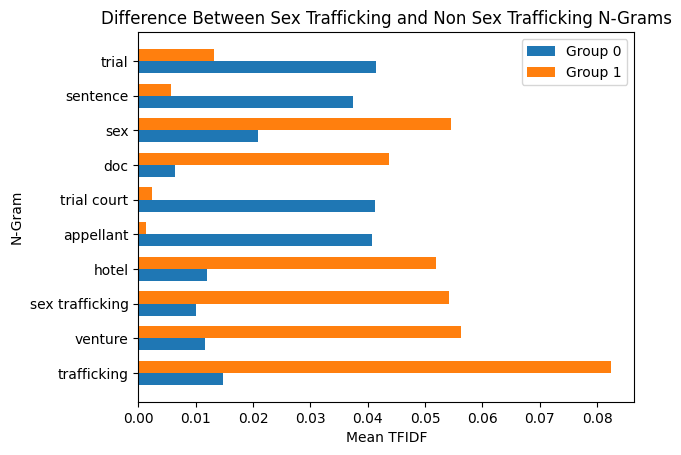

In [17]:
import matplotlib.pyplot as plt
import numpy as np

categories = tfidf_df.index
values1 = tfidf_df[0]
values2 = tfidf_df[1]

# Calculate the absolute difference 
diff_values = np.abs(np.array(values1) - np.array(values2))

# Get the indices of the top 10 largest differences
top_indices = np.argsort(diff_values)[-10:][::-1] 

# Get the top 10 categories, values1, and values2 based on the indices
top_categories = [categories[i] for i in top_indices]
top_values1 = [values1[i] for i in top_indices]
top_values2 = [values2[i] for i in top_indices]

# Sort data by the greatest difference to smallest difference
sorted_indices = np.argsort(diff_values[top_indices])[::-1]
sorted_categories = [top_categories[i] for i in sorted_indices]
sorted_values1 = [top_values1[i] for i in sorted_indices]
sorted_values2 = [top_values2[i] for i in sorted_indices]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the y-axis
y = np.arange(len(sorted_categories))

# Create the grouped bar plot with sorted axis
plt.barh(y - bar_width/2, sorted_values1, height=bar_width, label='Group 0')
plt.barh(y + bar_width/2, sorted_values2, height=bar_width, label='Group 1')

# Add labels, title, and legend
plt.xlabel('Mean TFIDF')
plt.ylabel('N-Gram')
plt.title('Difference Between Sex Trafficking and Non Sex Trafficking N-Grams')
plt.yticks(y, top_categories)
plt.legend()
    
# Show the plot
plt.show()

In [18]:
mymodel.log_class_train()

Accuracy after tuning: 0.8095238095238095
